<a href="https://colab.research.google.com/github/mikapedrosa/teste/blob/main/MINI_PROJETO_01_MIKAELY_MARTINS_PEDROSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qual seria os 5
imóveis que a empresa deveria investir e o porquê e
quais 5 você não recomendaria o investimento de
jeito nenhum. 

# IMPORTANDO DATASET E BIBLIOTECAS

In [ ]:
# IMPORTANDO AS BIBLIOTECAS:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [ ]:
# IMPORTANDO OS DADOS:
  # Uma vez feito o Download no Kaggle, o arquivo foi importado para o Colab e, para lê-lo, usou-se o comando:

df = pd.read_csv('/content/kc_house_data.csv')


In [ ]:
# Mostrando as seis primeiras linhas da tabela:

df.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


# TRATAMENTO DOS DADOS

In [ ]:
# Tipos de variáveis por coluna:

df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Observa-se que não há valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
## Observa-se que na coluna acima 'date' as datas estão como objeto, ou seja, como string. 
# Precisaremos transformá-la em uma coluna de data com a função do pandas "to_datetime":

df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [ ]:
# Agora com o uso do datetime, a coluna 'date' já foi reorganizada com as datas no formato ideal:
df.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [ ]:
# Descrição dos dados de cada coluna:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# CRIANDO UMA FUNÇÃO PARA ADICIONAR UMA COLUNA COM O NOME DAS CIDADES:
# Documentação 'Us Zipcode' disponível em: <https://uszipcode.readthedocs.io/01-Usage-Example/index.html>

!pip install uszipcode # instalando a biblioteca US ZIPCODE
from uszipcode import SearchEngine, SimpleZipcode

# A função criada com nome 'zip' vai passar pela coluna 'zipcode' retornando o nome da cidade em uma nova coluna:
search = SearchEngine()
def zip(x):
  city = search.by_zipcode(x).major_city
  return city if city else 'None'

df['city'] = df['zipcode'].apply(zip) # Nova coluna 'city' foi criada

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 KB 14.1 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
df
# Mostrando a tabela com a nova coluna 'City':

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [ ]:
## Verificação de Valores nulos:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
city             0
dtype: int64

# EXPLORANDO OS DADOS

In [ ]:
# Distribuição dos imóveis por cidades
cidades = df['city'].value_counts().to_frame()
cidades = cidades.sort_values(by='city', ascending=False)
cidades

,city
Seattle,8977
Renton,1597
Bellevue,1407
Kent,1203
Redmond,979
Kirkland,977
Auburn,912
Sammamish,800
Federal Way,779
Issaquah,733


In [ ]:
# Prevalência do nº de andares
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [ ]:
# Visualizando os anos de renovação do imóvel:
df['yr_renovated'].value_counts().to_frame()

,yr_renovated
0,20699
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1
1954,1


In [ ]:
# Mediana do nº de andares
mediana_floors = np.median(df['floors'])
print(mediana_floors)

1.5


In [ ]:
# Prevalência do nº de quartos
df['bedrooms'].value_counts().to_frame()

,bedrooms
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13
9,6


In [ ]:
# Mediana do número de quartos:
mediana_quartos = np.median(df['bedrooms'])
print(mediana_quartos)

3.0


In [ ]:
# qualidade do material utilizado na construção
df['grade'].value_counts().to_frame()

,grade
7,8981
8,6068
9,2615
6,2038
10,1134
11,399
5,242
12,90
4,29
13,13


In [ ]:
# Prevalência do nº de banheiros
df['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5380
1.00,3852
1.75,3048
2.25,2047
2.00,1930
1.50,1446
2.75,1185
3.00,753
3.50,731
3.25,589


In [ ]:
# Mediana do nº de banheiros:
mediana_banheiro = np.median(df['bathrooms'])
print(mediana_banheiro)

2.25


In [ ]:
# Mediana da área construída:
mediana_area_constr = df_final['sqft_living'].median()
print(mediana_area_constr)

1910.0


In [ ]:
# Mediana de preços:
mediana_preco = df_final['price'].median()
print(mediana_preco)

450000.0


ANALISANDO CORRELAÇÕES

In [ ]:
# Aqui iremos criar um novo dataframe a partir do 'df' original, selecionando algumas variáveis de interesse para realizar as correlações:
df_clone=df[:]
df_final=df_clone[[ 'price', 'bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition', 'waterfront']]

<AxesSubplot:>

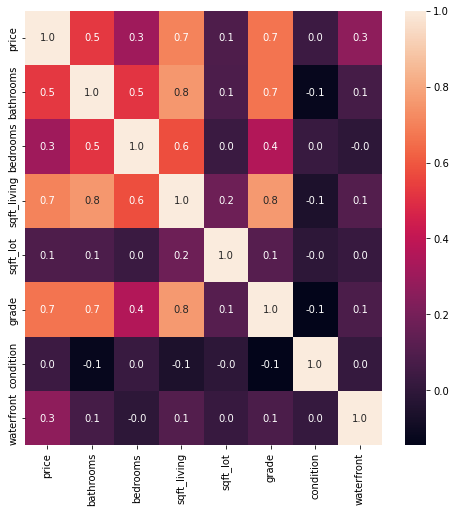

In [ ]:
# Gráfico para verificar a matriz de correlação entre algumas variáveis selecionadas e o preço:
matriz_correlacao = df_final.corr()
plt.figure(figsize = (8,8))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d6610c280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d6610c820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d660fdf70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d6610cdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d6609d0d0>],
 'means': []}

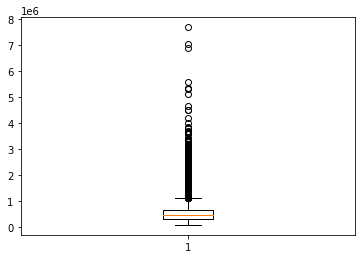

In [ ]:
# BOXPLOT com PREÇOS
precos = df['price']


plt.boxplot(precos)

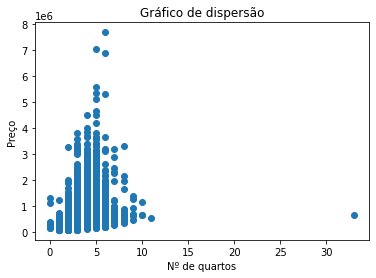

In [ ]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)

# gráfico de dispersão
plt.scatter(df['bedrooms'], df['price'])

plt.xlabel('Nº de quartos')
plt.ylabel('Preço')
plt.title('Gráfico de dispersão')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

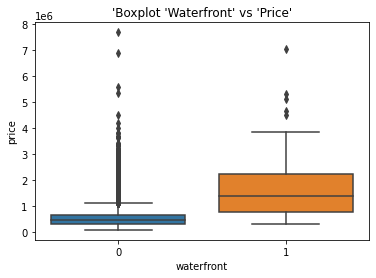

In [ ]:
# VISTA PARA O MAR vs PREÇO
sns.boxplot(df['waterfront'], df['price'])
plt.title("'Boxplot 'Waterfront' vs 'Price'")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot: Price vs Bedrooms')

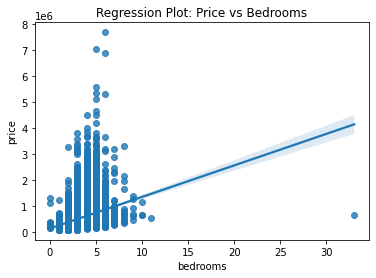

In [ ]:
# Gráfico de regressão para avaliar correlação entre quantidade de quartos e preço:
sns.regplot(df['bedrooms'], df['price'])
plt.title("Regression Plot: Price vs Bedrooms")

# **DEFININDO OS CRITÉRIOS E SELECIONANDO OS IMÓVEIS**

CRITÉRIO 1:

Imóveis que comportem uma família pequena (entre 2 e 4 pessoas)

Serão selecionados os imóveis que possuam entre 2 e 4 quartos.

In [ ]:
criterio1 = (df['bedrooms'] <=2) & (df['bedrooms'] <=4)


CRITÉRIO 2:

Imóveis com 1 ou 2 andares

In [ ]:
criterio2 = (df['floors'] >= 1) & (df['floors'] <= 2)

CRITÉRIO 3:

Imóveis a partir de 2 banheiros.

In [ ]:
criterio3 = (df['bathrooms'] >= 2)

CRITÉRIO 4:

Como a média do valor dos imóveis habitados pelo proprietário gira em torno de $651900, selecionaremos os imóveis com valor menor que média para que haja margem para lucro.



In [ ]:
criterio4 = (df['price'] <= 651900)

CRITÉRIO 5:

O valor da área construída maior que a média. Em conjunto com um preço menor que a média, selecionaremos imóveis que possam ser mais valorizados.

In [ ]:
criterio5 = (df['sqft_living'] >= 1910)

CRITÉRIO 6:

Qualidade do material de construção. Varia de 1 a 13.

Selecionaremos os que tenha nota de 6 para cima.

In [ ]:
criterio6 = (df['grade'] >= 6)

CRITÉRIO 7:

Vista do imóvel. Varia de 0 a 4.
Selecionaremos os de nota 3 para cima.

In [ ]:
criterio7 = (df['view'] >= 3)

In [ ]:
## Criando um dataframe com todos os critérios criados acima:

df_criterios = df.loc[criterio1 & criterio2 & criterio3 & criterio4 & criterio5 & criterio6 & criterio7]
df_criterios.shape

(5, 22)

In [ ]:
df_criterios = df_criterios.sort_values('price', ascending=True)
df_criterios.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
3829,8550001515,2014-10-01,429592.0,2,2.75,1992,10946,1.5,1,4,...,1288,704,1903,0,98070,47.3551,-122.475,1110,8328,Vashon
8325,567000025,2015-04-02,577500.0,2,2.50,2330,3000,2.0,0,3,...,2330,0,1915,1994,98144,47.5953,-122.294,1760,4000,Seattle
13312,1822039138,2015-02-27,600000.0,2,2.25,2320,18919,2.0,1,4,...,2320,0,1976,0,98070,47.3905,-122.462,1610,18919,Vashon
16674,623039026,2014-11-25,645000.0,2,2.25,2770,11884,1.0,0,3,...,1570,1200,1969,0,98070,47.5098,-122.474,2310,17097,Vashon
7044,8886000005,2015-03-09,649000.0,2,2.75,2090,23962,2.0,0,3,...,2090,0,1988,0,98070,47.4145,-122.440,1820,32340,Vashon


PIORES IMÓVEIS PARA INVESTIR


1. Preço muito elevado, pois pode dificultar a negociação visto que foge do padrão comercial do Condado; (price > 900000);

2. Com uma vista que não é considerada agradável (view < 2), fator que pode dificultar a venda posteriormente;

3. Quantidade pequena de banheiros, pelo preço cobrado (bathrooms < 2)

4. Material utilizado com qualidade inferior, pelo preço que é cobrado (grade < 7)

In [ ]:
excluir1 = (df['price'] > 900000)

In [ ]:
excluir2 = (df['view'] < 2)

In [ ]:
excluir3 = (df['bathrooms'] <2)

In [ ]:
excluir4 = (df['grade'] < 7)

In [ ]:
df_excluidos = df.loc[excluir1 & excluir2 & excluir3 & excluir4]
df_excluidos.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
6243,5536100010,2015-02-04,1050000.0,4,1.0,1330,9729,1.0,0,0,...,1330,0,1952,0,98004,47.6223,-122.208,2920,10353,Bellevue
7319,5101403915,2015-04-03,970000.0,2,1.0,1290,5376,1.0,0,0,...,1290,0,1945,0,98115,47.6966,-122.315,1180,5376,Seattle
8387,4389201021,2014-07-01,1014250.0,3,1.0,1640,12855,1.5,0,0,...,1500,140,1920,0,98004,47.6169,-122.212,2190,11262,Bellevue
9314,4389200610,2014-12-01,903000.0,2,1.5,1140,7800,1.0,0,0,...,1140,0,1947,0,98004,47.6142,-122.209,2020,7800,Bellevue
18685,3325069064,2015-03-26,1052000.0,3,1.0,1860,44431,1.0,0,0,...,1860,0,1947,0,98074,47.6057,-122.038,2000,44431,Sammamish
